In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv(R"C:\Users\kevca\Downloads\climate_change_impact_on_agriculture_2024.csv")
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [21]:
df_new = df.sort_values(by='Year', ascending=True).reset_index(drop=True)
df_new.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,1990,China,North,Wheat,4.21,1544.36,23.91,1.098,4,46.96,29.73,46.67,37.80,Organic Farming,413.94
1,1990,Brazil,Northeast,Sugarcane,2.53,818.35,26.60,2.115,3,64.28,10.28,73.15,53.70,Water Management,285.66
2,1990,Argentina,Pampas,Wheat,14.98,1175.60,25.88,4.383,8,57.06,20.34,60.94,65.92,No Adaptation,1177.04
3,1990,Nigeria,North West,Barley,30.02,1900.22,15.67,3.402,9,40.47,31.58,44.36,77.78,Organic Farming,1149.29
4,1990,Argentina,Pampas,Vegetables,17.56,1517.35,18.70,3.483,3,42.85,12.24,53.53,32.89,Crop Rotation,849.05


In [7]:
df_new.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [10]:
df_new.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [29]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    higher_bound = Q3 + 1.5 * IQR

    outliers_count = len(df[(df[column] < lower_bound) | (df[column] < higher_bound)])
    print(f"Outliers in {column}: {outliers_count}")

    return df[(df[column] >= lower_bound) & (df[column] >= higher_bound)]

In [39]:
og_size = len(df_new)
clean_df = remove_outliers(df_new, 'Crop_Yield_MT_per_HA')
clean_df = remove_outliers(df_new, 'Average_Temperature_C')
clean_df = remove_outliers(df_new, 'Total_Precipitation_mm')

print(f"Data after removal of outlier: {len(clean_df)} rows (removed {og_size - len(clean_df)} outliers)")

Outliers in Crop_Yield_MT_per_HA: 10000
Outliers in Average_Temperature_C: 10000
Outliers in Total_Precipitation_mm: 10000
Data after removal of outlier: 0 rows (removed 10000 outliers)


Feature Engineering

In [51]:
print("Creating polynomial features")
clean_df['temp_sqrd'] = clean_df['Average_Temperature_C']**2
clean_df['precip_sqrd'] = clean_df['Total_Precipitation_mm']**2
clean_df['co2_sqrd'] = clean_df['CO2_Emissions_MT']**2


Creating polynomial features


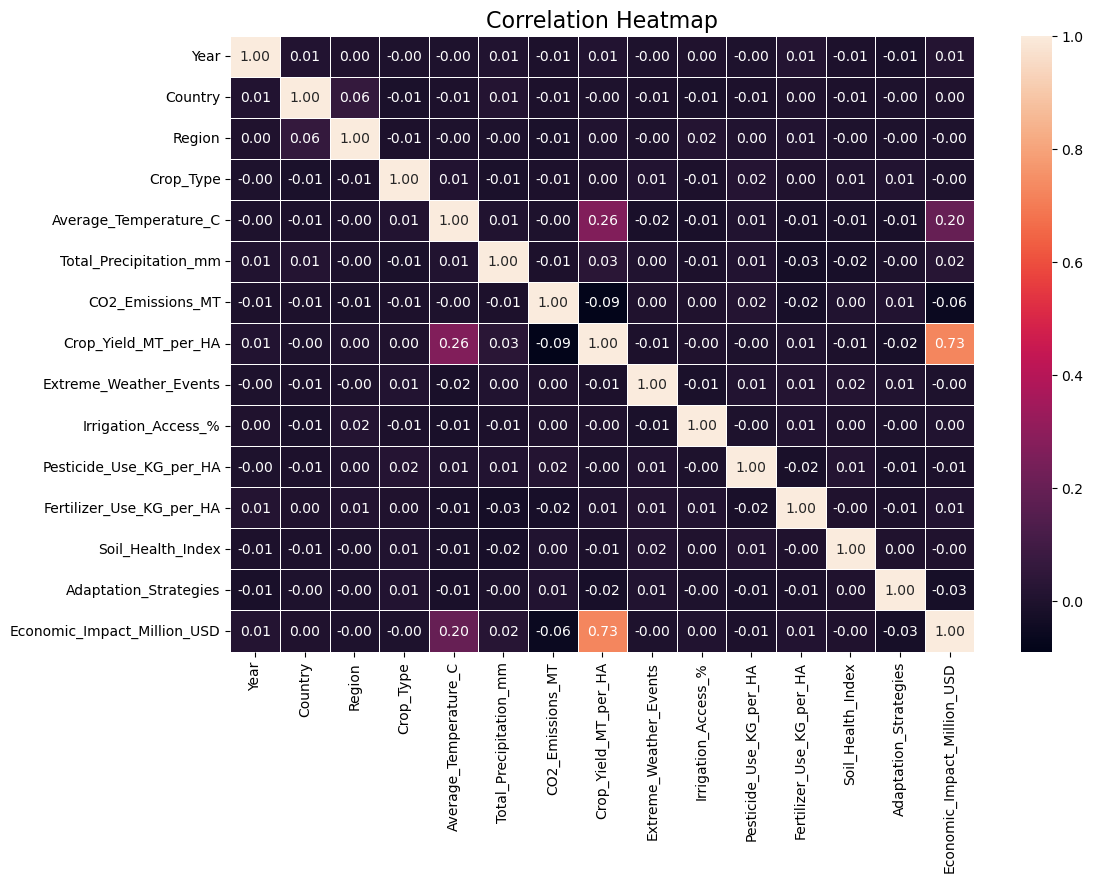

In [15]:
categorical_columns = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_new[column] = le.fit_transform(df_new[column])
    label_encoders[column] = le

plt.figure(figsize=(12, 8))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Text(0, 0.5, 'Crop Yield (Hectare)')

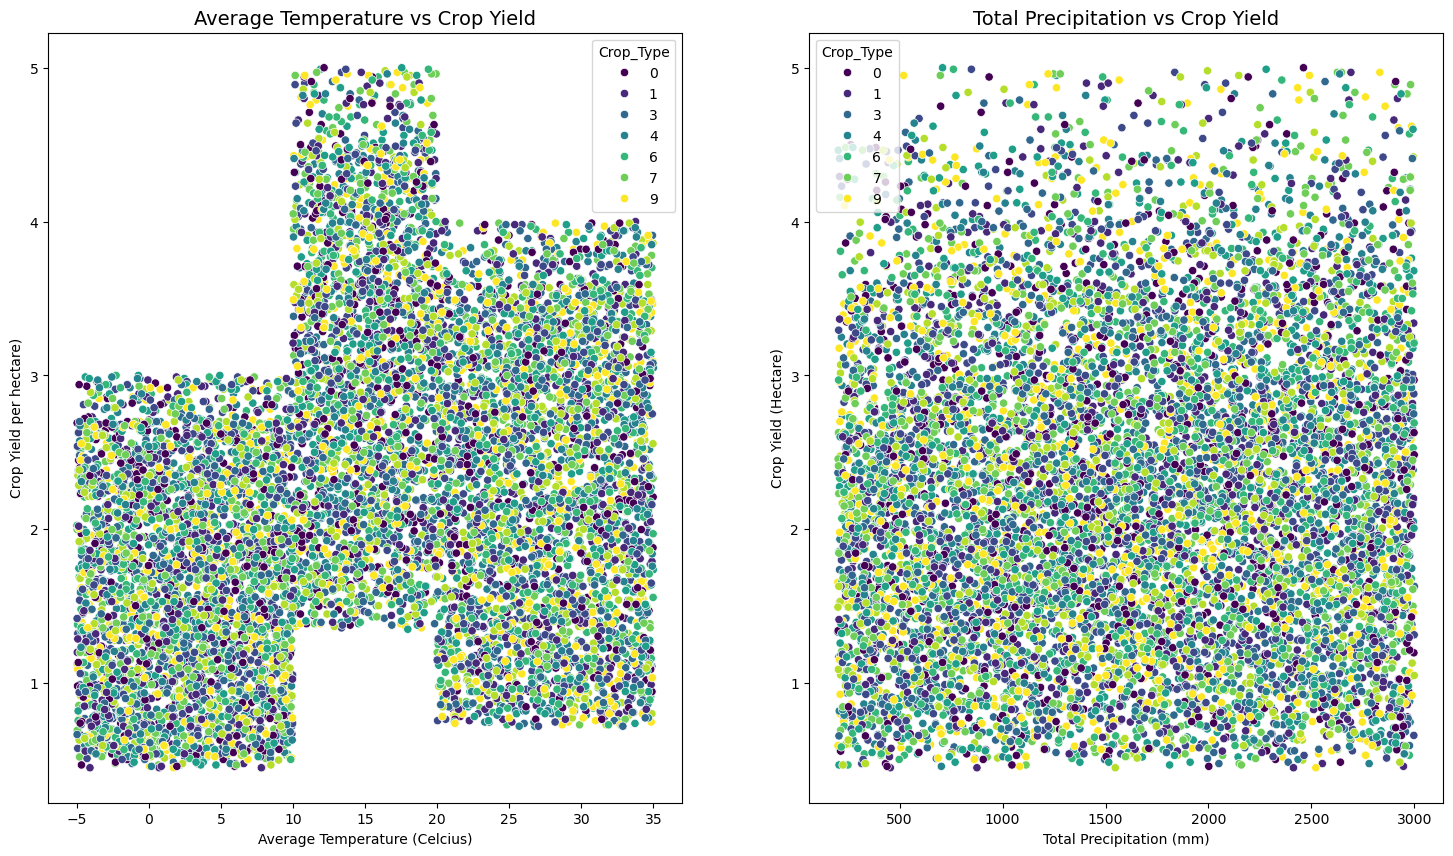

In [16]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', data=df_new, hue='Crop_Type', palette='viridis')
plt.title('Average Temperature vs Crop Yield', fontsize=14)
plt.xlabel('Average Temperature (Celcius)')
plt.ylabel('Crop Yield per hectare)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', data=df_new, hue='Crop_Type', palette='viridis')
plt.title('Total Precipitation vs Crop Yield', fontsize=14)
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Crop Yield (Hectare)')

In [19]:
label_encoders = {}

scaler = StandardScaler()
numerical_features = [
    'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
    'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD'
]
df_new[numerical_features] = scaler.fit_transform(df_new[numerical_features])

X = df_new.drop('Crop_Yield_MT_per_HA', axis=1)
y = df_new['Crop_Yield_MT_per_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
9254,2022,8,23,5,0.575482,1.499915,-1.160393,-0.625748,-1.346763,-1.645641,0.744570,-0.116925,4,-0.689315
1561,1995,4,1,8,-0.197211,-1.162312,-1.172036,1.585488,1.156027,-0.066647,-0.547333,-0.922575,3,-0.729501
1670,1995,0,12,9,1.241778,0.621280,-1.018351,-0.625748,1.444248,-0.189489,1.574606,-0.708164,3,1.261064
6087,2011,7,9,6,-1.617014,0.128123,-0.769195,-1.257530,0.979400,-0.324062,-0.475232,0.154927,2,0.727935
6669,2013,7,9,3,-0.352448,0.746029,0.331051,1.269597,1.441169,0.026519,-0.489164,-1.181551,1,2.084398


In [20]:
linear_reg = LinearRegression()


linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr

(0.4327969948511155, 0.5618641220466289)

In [21]:
random_forest = RandomForestRegressor(random_state=42)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.3784579688057, 0.6168734616834008)

In [22]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R² Score from Random Search: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best R² Score from Random Search: 0.6098331437267749
